In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [4]:
model = cv2.dnn.readNet(model='denseNet/DenseNet_121.caffemodel', config='denseNet/DenseNet_121.prototxt', framework='Caffe')

In [46]:
# read the ImageNet class names
with open('denseNet/classes.txt', 'r') as f:
   image_net_names = f.read().split('\n')
# final class names (just the first word of the many ImageNet names for one image)
class_names = [name.split(',')[0] for name in image_net_names]
class_names

['tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead',
 'electric ray',
 'stingray',
 'cock',
 'hen',
 'ostrich',
 'brambling',
 'goldfinch',
 'house finch',
 'junco',
 'indigo bunting',
 'robin',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water ouzel',
 'kite',
 'bald eagle',
 'vulture',
 'great grey owl',
 'European fire salamander',
 'common newt',
 'eft',
 'spotted salamander',
 'axolotl',
 'bullfrog',
 'tree frog',
 'tailed frog',
 'loggerhead',
 'leatherback turtle',
 'mud turtle',
 'terrapin',
 'box turtle',
 'banded gecko',
 'common iguana',
 'American chameleon',
 'whiptail',
 'agama',
 'frilled lizard',
 'alligator lizard',
 'Gila monster',
 'green lizard',
 'African chameleon',
 'Komodo dragon',
 'African crocodile',
 'American alligator',
 'triceratops',
 'thunder snake',
 'ringneck snake',
 'hognose snake',
 'green snake',
 'king snake',
 'garter snake',
 'water snake',
 'vine snake',
 'night snake',
 'boa constrictor',
 'rock python',
 'Indian cobr

In [47]:
#lendo a img
im = cv2.imread('imgs/tiger.jpg')

# create blob from image
blob = cv2.dnn.blobFromImage(image=im, scalefactor=0.01, size=(224, 224), mean=(104, 117, 123))

In [48]:
# set the input blob for the neural network
model.setInput(blob)
# forward pass image blog through the model
outputs = model.forward()

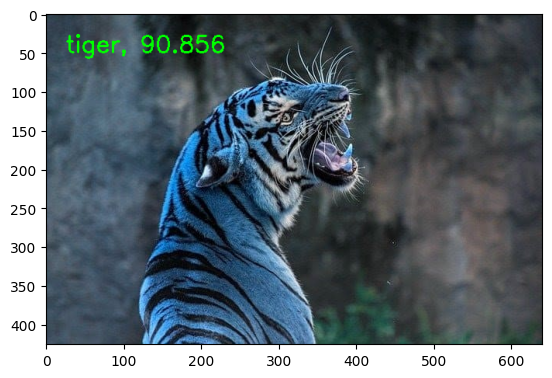

In [ ]:
final_outputs = outputs[0]
# make all the outputs 1D
final_outputs = final_outputs.reshape(1000, 1)
# get the class label
label_id = np.argmax(final_outputs)
# convert the output scores to softmax probabilities
probs = np.exp(final_outputs) / np.sum(np.exp(final_outputs))
# get the final highest probability
final_prob = np.max(probs) * 100.
# map the max confidence to the class label names
out_name = class_names[label_id]
out_text = f"{out_name}, {final_prob:.3f}"
# put the class name text on top of the image
cv2.putText(im, out_text, (25, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

fig, ax = plt.subplots()
ax.imshow(im)
plt.show()

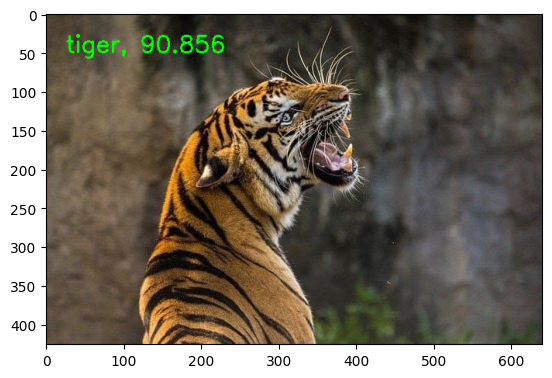

In [ ]:
im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots()
ax.imshow(im_rgb)

plt.show()